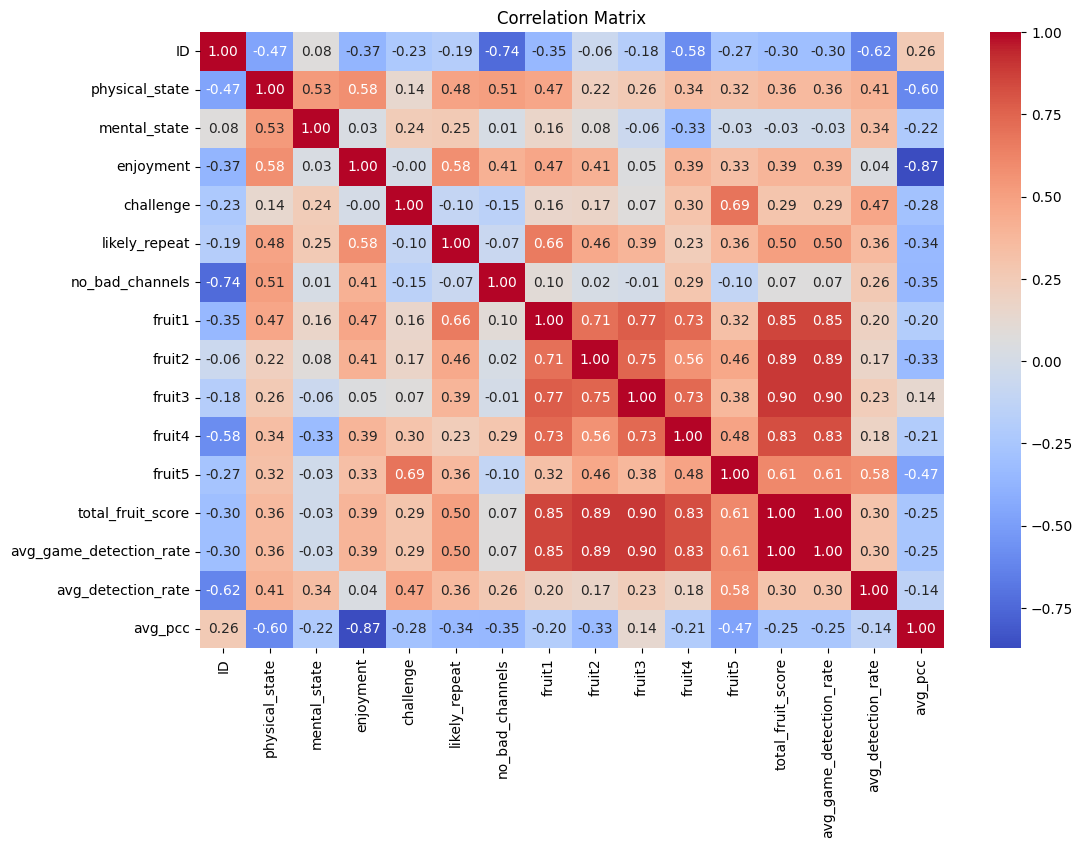

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("BCIPacMan_GameScore.xlsx", sheet_name="Data")

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Avg Game Detection Rate as target

/var/folders/8z/lyrry3554djbqwn014snlnzc0000gn/T/ipykernel_96849/2467775113.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="avg_pcc", y="avg_game_detection_rate", palette="viridis")


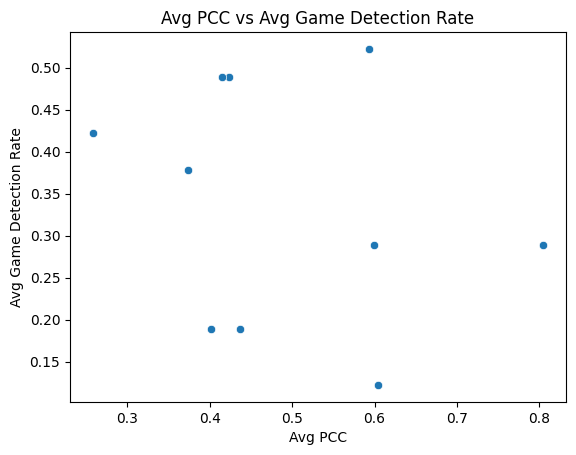

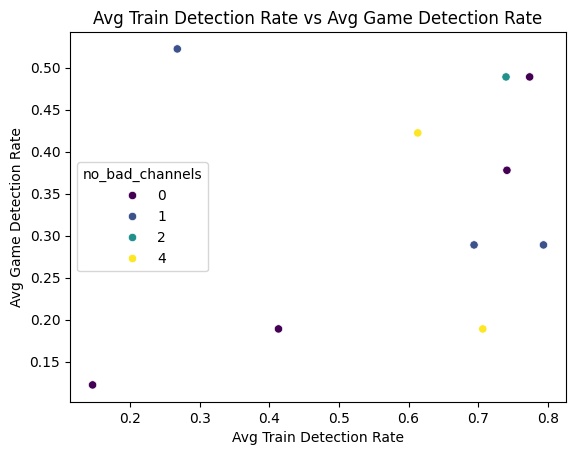

/var/folders/8z/lyrry3554djbqwn014snlnzc0000gn/T/ipykernel_96849/2467775113.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="avg_game_detection_rate", y="likely_repeat", palette="viridis")


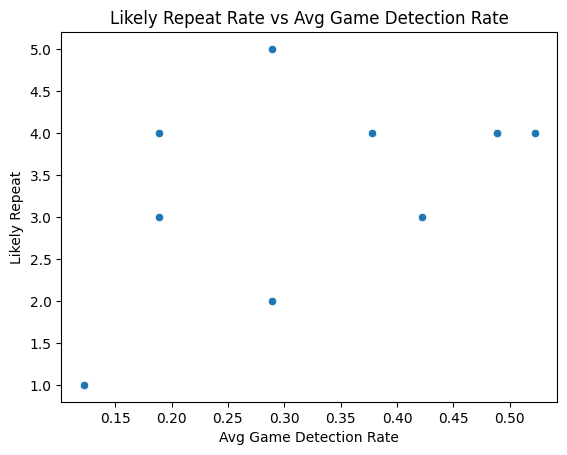

/var/folders/8z/lyrry3554djbqwn014snlnzc0000gn/T/ipykernel_96849/2467775113.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="avg_game_detection_rate", y="enjoyment", palette="viridis")


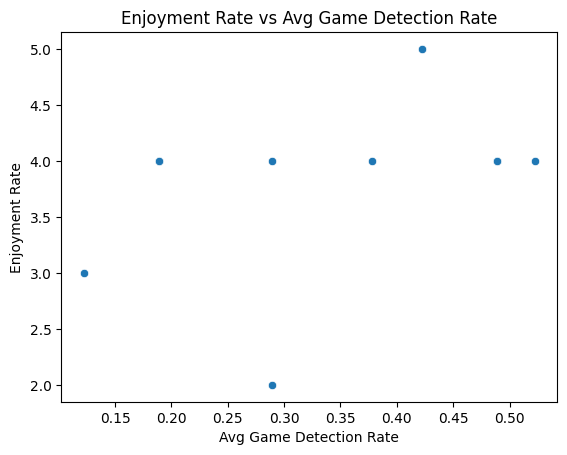

/var/folders/8z/lyrry3554djbqwn014snlnzc0000gn/T/ipykernel_96849/2467775113.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="avg_game_detection_rate", y="challenge", palette="viridis")


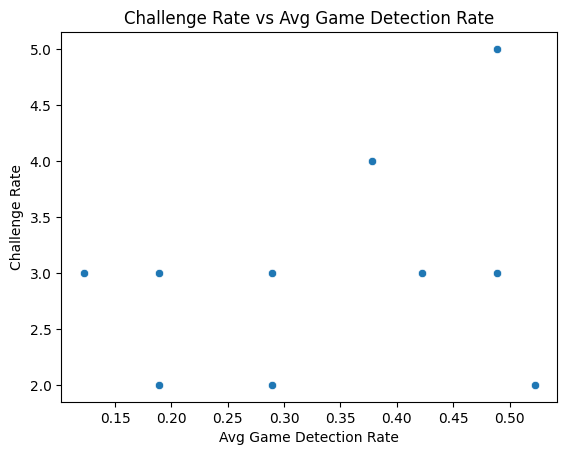

In [64]:
# Scatter plot for avg_pcc vs avg_game_detection_rate
sns.scatterplot(data=df, x="avg_pcc", y="avg_game_detection_rate", palette="viridis")
plt.title("Avg PCC vs Avg Game Detection Rate")
plt.xlabel("Avg PCC")
plt.ylabel("Avg Game Detection Rate")
plt.show()
# Scatter plot for avg_detection_rate vs avg_game_detection_rate
sns.scatterplot(data=df, x="avg_detection_rate", y="avg_game_detection_rate", hue="no_bad_channels", palette="viridis")
plt.title("Avg Train Detection Rate vs Avg Game Detection Rate")
plt.xlabel("Avg Train Detection Rate")
plt.ylabel("Avg Game Detection Rate")
plt.show()
# Scatter plot for avg_detection_rate vs avg_game_detection_rate
sns.scatterplot(data=df, x="avg_game_detection_rate", y="likely_repeat", palette="viridis")
plt.title("Likely Repeat Rate vs Avg Game Detection Rate")
plt.xlabel("Avg Game Detection Rate")
plt.ylabel("Likely Repeat")
plt.show()
# Scatter plot for avg_detection_rate vs avg_game_detection_rate
sns.scatterplot(data=df, x="avg_game_detection_rate", y="enjoyment", palette="viridis")
plt.title("Enjoyment Rate vs Avg Game Detection Rate")
plt.xlabel("Avg Game Detection Rate")
plt.ylabel("Enjoyment Rate")
plt.show()
# Scatter plot for avg_detection_rate vs avg_game_detection_rate
sns.scatterplot(data=df, x="avg_game_detection_rate", y="challenge", palette="viridis")
plt.title("Challenge Rate vs Avg Game Detection Rate")
plt.xlabel("Avg Game Detection Rate")
plt.ylabel("Challenge Rate")
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define independent and dependent variables
X = df[["physical_state", "mental_state", "enjoyment", "challenge", "likely_repeat", "no_bad_channels", "avg_detection_rate", "avg_pcc"]]
y = df["avg_game_detection_rate"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))

# Display coefficients
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coef_df)

R^2 Score: 0.0
              Feature  Coefficient
0      physical_state     0.130675
1        mental_state     0.022892
2           enjoyment    -0.095779
3           challenge     0.112445
4       likely_repeat     0.105381
5     no_bad_channels     0.093803
6  avg_detection_rate    -0.491986
7             avg_pcc     0.297592


              Feature  Importance
7             avg_pcc    0.412739
0      physical_state    0.249035
4       likely_repeat    0.115514
2           enjoyment    0.088841
6  avg_detection_rate    0.060069
5     no_bad_channels    0.043732
3           challenge    0.016496
1        mental_state    0.013574


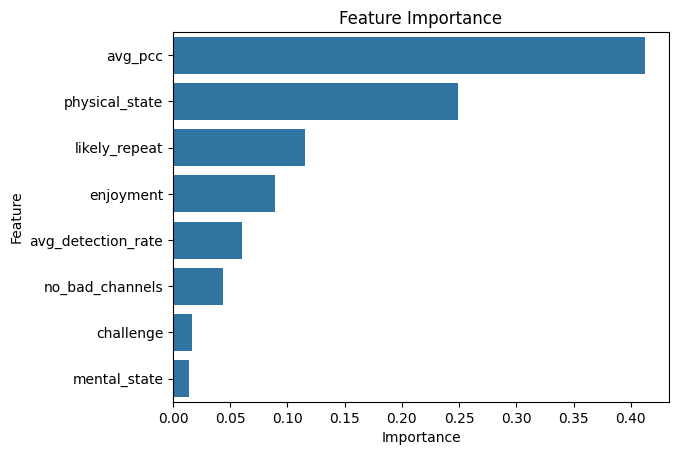

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print(feature_importance)

# Plot feature importance
sns.barplot(data=feature_importance, x="Importance", y="Feature")
plt.title("Feature Importance")
plt.show()

# Fruit 1 Score as target

/var/folders/8z/lyrry3554djbqwn014snlnzc0000gn/T/ipykernel_96849/4235148891.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="avg_pcc", y="fruit5", palette="viridis")


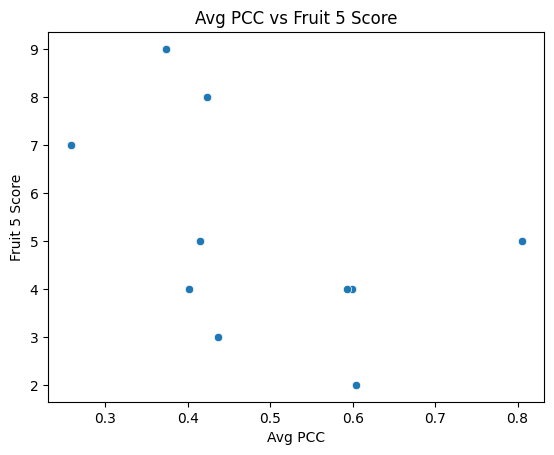

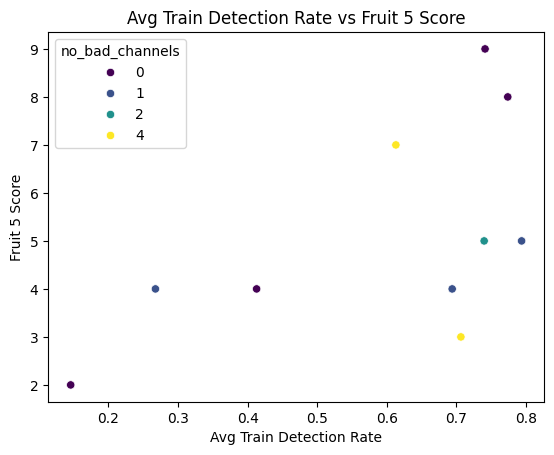

In [59]:
# Scatter plot for avg_pcc vs fruit1
sns.scatterplot(data=df, x="avg_pcc", y="fruit5", palette="viridis")
plt.title("Avg PCC vs Fruit 5 Score")
plt.xlabel("Avg PCC")
plt.ylabel("Fruit 5 Score")
plt.show()
# Scatter plot for avg_detection_rate vs fruit1
sns.scatterplot(data=df, x="avg_detection_rate", y="fruit5", hue="no_bad_channels", palette="viridis")
plt.title("Avg Train Detection Rate vs Fruit 5 Score")
plt.xlabel("Avg Train Detection Rate")
plt.ylabel("Fruit 5 Score")
plt.show()

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define independent and dependent variables
X = df[["physical_state", "mental_state", "enjoyment", "challenge", "likely_repeat", "no_bad_channels", "avg_detection_rate", "avg_pcc"]]
y = df["fruit1"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))

# Display coefficients
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coef_df)

R^2 Score: -7.547534280005717
              Feature  Coefficient
0      physical_state     0.642042
1        mental_state     0.408117
2           enjoyment    -2.012061
3           challenge     3.038010
4       likely_repeat     3.466399
5     no_bad_channels     2.132458
6  avg_detection_rate   -13.773687
7             avg_pcc     8.317761


              Feature  Importance
4       likely_repeat    0.349439
7             avg_pcc    0.221279
6  avg_detection_rate    0.142627
2           enjoyment    0.129734
0      physical_state    0.057767
1        mental_state    0.039449
3           challenge    0.038774
5     no_bad_channels    0.020930


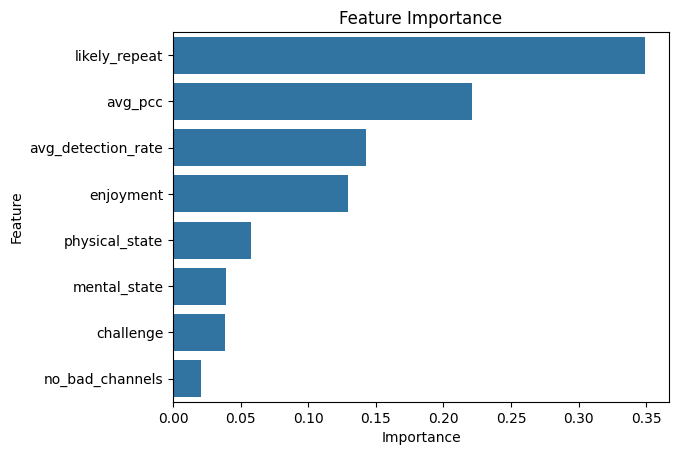

In [58]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print(feature_importance)

# Plot feature importance
sns.barplot(data=feature_importance, x="Importance", y="Feature")
plt.title("Feature Importance")
plt.show()